# Digital Image and Video Processing: Lab 2

### Targets
Image processing and analysis.

### Guideline
1. Duration: 90mins.
2. Provide your personal information in the next block.
3. Max: 110pts/100pts.

### Student information
Full name: Nguyễn Ngọc Thảo

Student ID: 24MSE33030

Group: 2

*Note: find your student ID in `img_student_id_url` if neccessary.*

In [2]:
# basic libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from io import BytesIO
import requests

In [3]:
'''
additional libraries
Please leave your import commands within this block
'''
pass

In [4]:
# given data
img_student_id_url = 'https://drive.google.com/file/d/1-5CAkDYSEyjVQjhX6woh2bCHzTdTgFzc/view?usp=drive_link'
img_url1 = 'https://drive.google.com/uc?export=download&id=16RR0KbXSvfcplDIreSYvZXyDkYFR1pS4'
img_url2 = 'https://drive.google.com/uc?export=download&id=1nZeqtG2oC_TL7A-XxJm2CdIA_KYlg4k6'

In [5]:
def download_img(url):
  response = requests.get(url, stream=True)
  response.raise_for_status()

  # Read the image data from the response
  image_data = np.asarray(bytearray(response.content), dtype="uint8")

  # Decode the image using OpenCV
  img = cv.imdecode(image_data, cv.IMREAD_COLOR)

  return img

def cal_psnr(img1, img2):
  '''
  calculate PSNR value between two images with the same size and pixel values in the range of [0-255]
  img1: numpy array
  img2: numpy array
  '''
  mse = np.mean((img1 - img2) ** 2)
  if mse == 0:
    return float('Inf')

  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

# Question 1 (40pts)
1.1. Please download image from the given link. Show the downloaded image with its histogram. Please select the url for your input image based on the last number of your student ID.
- Odd number: `img_url1`
- Even number: `img_url2`

1.2. Please enhance the image (1.1) by equalize the histogram and print some comments about the output. Show the output.

1.3. Please inverse the intensity of the blue channel of the image (1.2). Show the concatenation of the output and the image (1.2).

1.4. Please swap the green and blue color channels of the image (1.2). Show the concatenation of the output and the image (1.2).

1.5. Please add noise to the image (1.2), and the type of noise depends on the last number of your student ID.
- Odd number: salt-and-pepper noise. Note, the PSNR value between the noisy and the input images must less than or equal 33.
- Even number: speckle noise. Note, the PSNR value between the noisy and the input images must less than or equal 29.

1.6. Please save and reshare the image (1.4) via are Google Drive link. Download it and calculate the PSNR value between this image and the input one.

1.7. Show the input image and the image (1.1)-(1.6) in the RGB color space with their histograms.

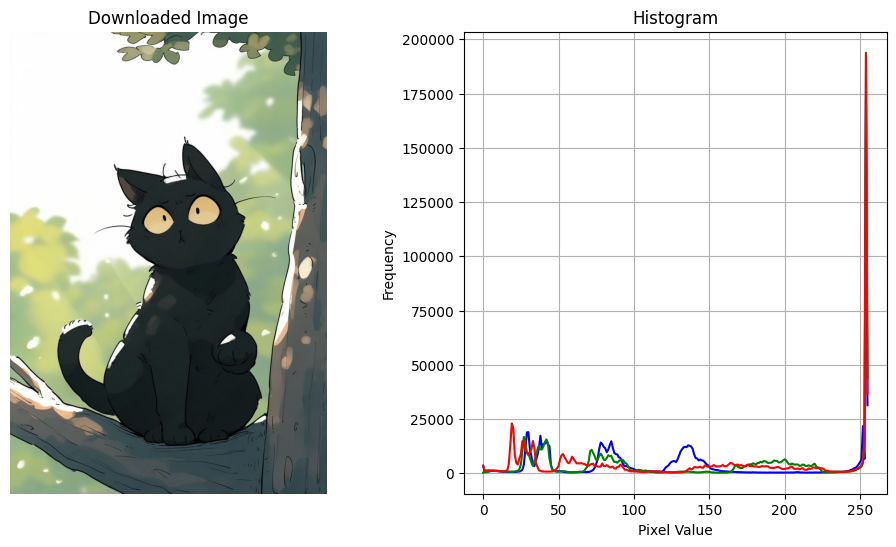

In [37]:
ID = 30
selected_url = img_url2 if ID % 2 == 0 else img_url1

# Tải ảnh
img = download_img(selected_url)

# Hiển thị ảnh và histogram
def display_image_and_histogram(img):
    # Chuyển ảnh sang RGB để hiển thị đúng màu sắc
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Hiển thị ảnh
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Downloaded Image")
    plt.axis("off")

    # Tính histogram
    plt.subplot(1, 2, 2)
    colors = ('b', 'g', 'r')  # Màu sắc của histogram
    for i, color in enumerate(colors):
        hist = cv.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title("Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

# Gọi hàm hiển thị
display_image_and_histogram(img)

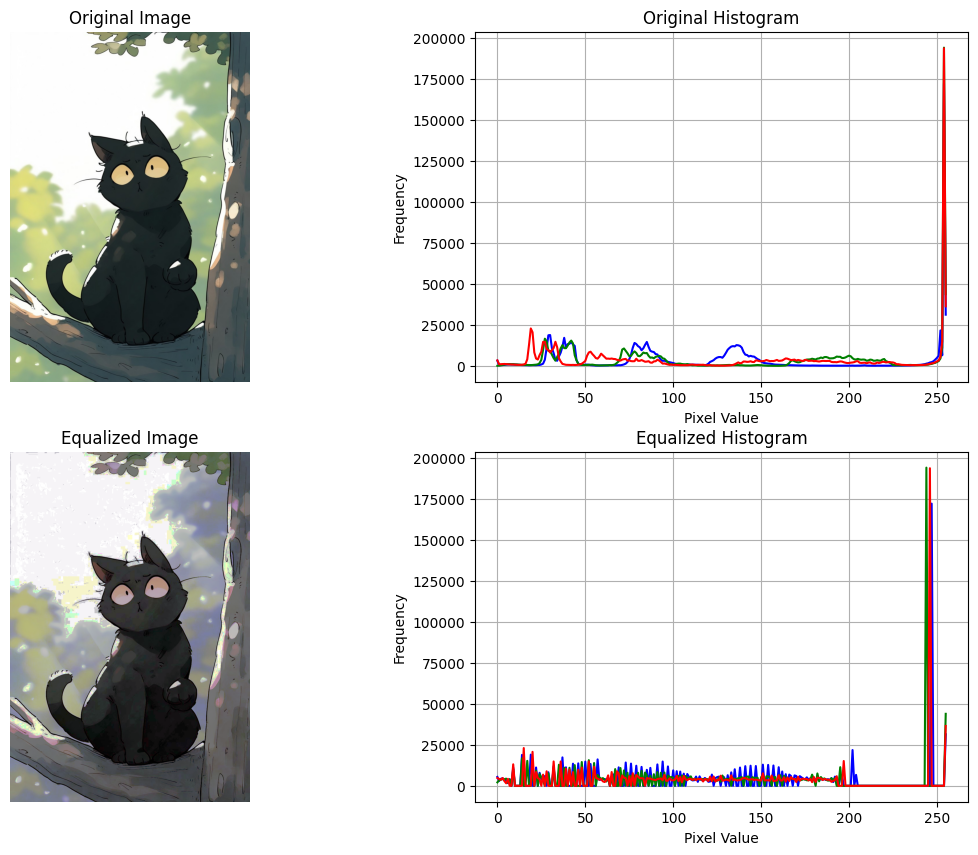

In [38]:
def equalize_histogram_color_image(img):
    """
    Cân bằng histogram của ảnh màu bằng cách xử lý từng kênh B, G, R riêng biệt.
    """
    # Tách kênh màu
    b, g, r = cv.split(img)

    # Cân bằng histogram cho từng kênh
    equalized_b = cv.equalizeHist(b)
    equalized_g = cv.equalizeHist(g)
    equalized_r = cv.equalizeHist(r)

    # Gộp các kênh lại thành ảnh màu
    equalized_img = cv.merge((equalized_b, equalized_g, equalized_r))
    return equalized_img

# Cân bằng histogram
equalized_img = equalize_histogram_color_image(img)

# Hiển thị ảnh trước và sau khi xử lý
def compare_images_with_histograms(original_img, processed_img):
    """
    So sánh ảnh gốc và ảnh sau xử lý, hiển thị histogram của cả hai.
    """
    # Chuyển đổi ảnh để hiển thị đúng màu
    original_rgb = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)
    processed_rgb = cv.cvtColor(processed_img, cv.COLOR_BGR2RGB)

    # Hiển thị ảnh
    plt.figure(figsize=(14, 10))

    # Ảnh gốc
    plt.subplot(2, 2, 1)
    plt.imshow(original_rgb)
    plt.title("Original Image")
    plt.axis("off")

    # Histogram ảnh gốc
    plt.subplot(2, 2, 2)
    colors = ('b', 'g', 'r')
    for i, color in enumerate(colors):
        hist = cv.calcHist([original_img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title("Original Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.grid()

    # Ảnh sau khi xử lý
    plt.subplot(2, 2, 3)
    plt.imshow(processed_rgb)
    plt.title("Equalized Image")
    plt.axis("off")

    # Histogram ảnh sau xử lý
    plt.subplot(2, 2, 4)
    for i, color in enumerate(colors):
        hist = cv.calcHist([processed_img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title("Equalized Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.grid()

    plt.show()

# So sánh ảnh gốc và ảnh sau khi cân bằng histogram
compare_images_with_histograms(img, equalized_img)


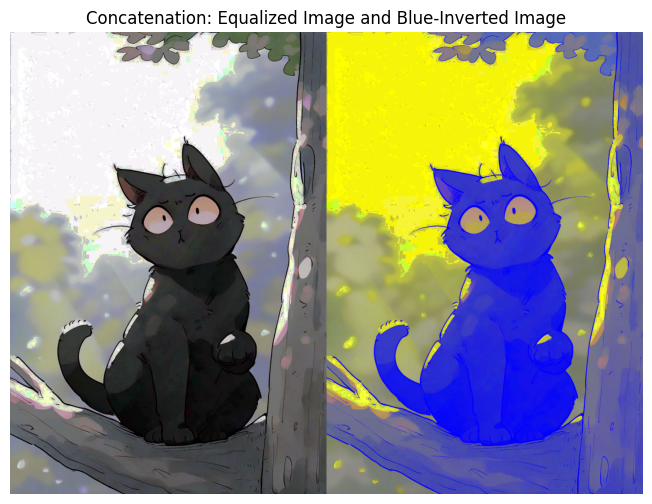

In [39]:
def invert_blue_channel(img):
    """
    Đảo ngược cường độ của kênh màu xanh (Blue channel) trong ảnh.
    """
    # Tách các kênh màu
    b, g, r = cv.split(img)

    # Đảo ngược cường độ của kênh xanh
    inverted_b = 255 - b

    # Ghép lại các kênh màu
    inverted_img = cv.merge((inverted_b, g, r))
    return inverted_img

# Đảo ngược kênh xanh của ảnh (1.2)
inverted_blue_img = invert_blue_channel(equalized_img)

# Ghép ảnh 1.2 và ảnh sau khi đảo kênh xanh
def concatenate_images(img1, img2):
    """
    Ghép hai ảnh theo chiều ngang.
    """
    return np.hstack((img1, img2))

concatenated_img = concatenate_images(equalized_img, inverted_blue_img)

# Hiển thị kết quả
def display_concatenated_images(concatenated_img):
    """
    Hiển thị ảnh ghép (1.2 và ảnh đã đảo kênh xanh).
    """
    # Chuyển đổi ảnh sang RGB để hiển thị đúng màu
    concatenated_rgb = cv.cvtColor(concatenated_img, cv.COLOR_BGR2RGB)

    # Hiển thị ảnh
    plt.figure(figsize=(12, 6))
    plt.imshow(concatenated_rgb)
    plt.title("Concatenation: Equalized Image and Blue-Inverted Image")
    plt.axis("off")
    plt.show()

# Hiển thị ảnh ghép
display_concatenated_images(concatenated_img)


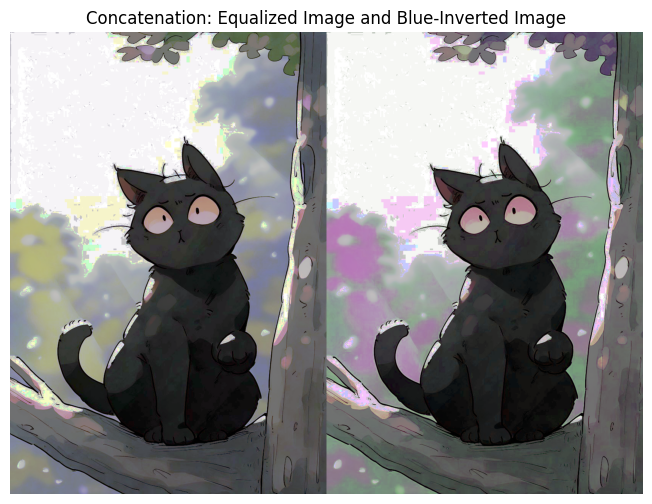

In [40]:
def swap_green_blue_channels(img):
    """
    Hoán đổi kênh xanh lá (Green) và xanh dương (Blue) trong ảnh.
    """
    # Tách các kênh màu
    b, g, r = cv.split(img)

    # Hoán đổi kênh xanh lá (Green) và xanh dương (Blue)
    swapped_img = cv.merge((g, b, r))
    return swapped_img

# Hoán đổi kênh xanh lá và xanh dương của ảnh (1.2)
swapped_channels_img = swap_green_blue_channels(equalized_img)

# Ghép ảnh gốc (1.2) và ảnh sau khi hoán đổi kênh màu
concatenated_img_swap = concatenate_images(equalized_img, swapped_channels_img)

# Hiển thị ảnh ghép
display_concatenated_images(concatenated_img_swap)


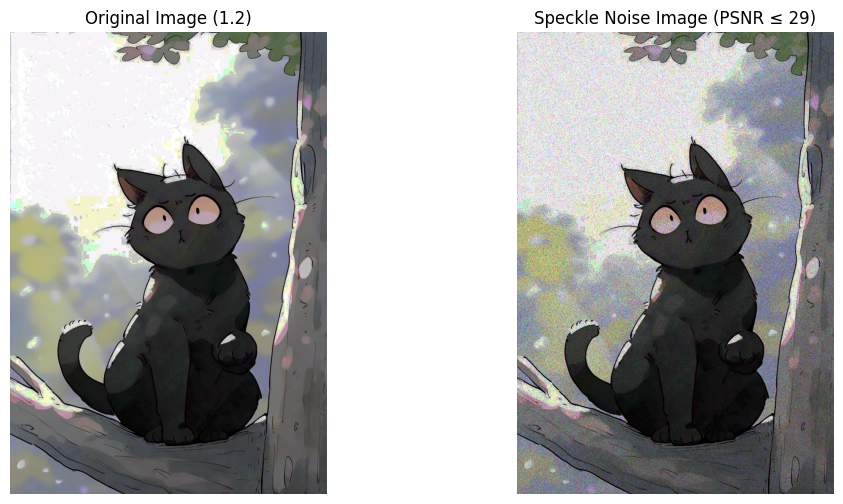

PSNR between original and noisy image: 29.00


In [41]:
import random

def add_speckle_noise(img, psnr_threshold=29):
    """
    Thêm nhiễu Speckle vào ảnh sao cho PSNR giữa ảnh gốc và ảnh bị nhiễu ≤ psnr_threshold.
    """
    noisy_img = img.copy()
    rows, cols, channels = img.shape

    # Khởi tạo giá trị sigma ban đầu
    sigma = 0.1  # Hệ số độ mạnh của nhiễu

    while True:
        # Tạo nhiễu Speckle
        noise = np.random.normal(0, sigma, (rows, cols, channels))
        noisy_img = img + img * noise
        noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

        # Tính PSNR giữa ảnh gốc và ảnh nhiễu
        psnr_value = cal_psnr(img, noisy_img)
        if psnr_value <= psnr_threshold:
            break
        # Tăng độ mạnh của nhiễu nếu PSNR > ngưỡng
        sigma += 0.01

    return noisy_img

# Thêm nhiễu Speckle vào ảnh (1.2)
noisy_img = add_speckle_noise(equalized_img, psnr_threshold=29)

# Hiển thị ảnh gốc và ảnh bị nhiễu
def display_noisy_image(original_img, noisy_img):
    """
    Hiển thị ảnh gốc và ảnh bị nhiễu để so sánh.
    """
    original_rgb = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)
    noisy_rgb = cv.cvtColor(noisy_img, cv.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 6))

    # Ảnh gốc
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title("Original Image (1.2)")
    plt.axis("off")

    # Ảnh bị nhiễu
    plt.subplot(1, 2, 2)
    plt.imshow(noisy_rgb)
    plt.title("Speckle Noise Image (PSNR ≤ 29)")
    plt.axis("off")

    plt.show()

# Hiển thị kết quả
display_noisy_image(equalized_img, noisy_img)

# Tính PSNR giữa ảnh gốc và ảnh bị nhiễu
psnr_result = cal_psnr(equalized_img, noisy_img)
print(f"PSNR between original and noisy image: {psnr_result:.2f}")


In [42]:
from google.colab import drive
import os

# Kết nối Google Drive
drive.mount('/content/drive')

# Đường dẫn lưu ảnh
save_path = '/content/drive/My Drive/swapped_channels_image.png'

# Lưu ảnh hoán đổi kênh (1.4) vào Google Drive
cv.imwrite(save_path, swapped_channels_img)
print(f"Image saved to: {save_path}")

# Tải ảnh từ Google Drive
downloaded_img = cv.imread(save_path)

# Kiểm tra PSNR giữa ảnh tải lại và ảnh gốc (1.2)
psnr_reloaded = cal_psnr(equalized_img, downloaded_img)
print(f"PSNR between reloaded image and original image: {psnr_reloaded:.2f}")


Mounted at /content/drive
Image saved to: /content/drive/My Drive/swapped_channels_image.png
PSNR between reloaded image and original image: 33.83


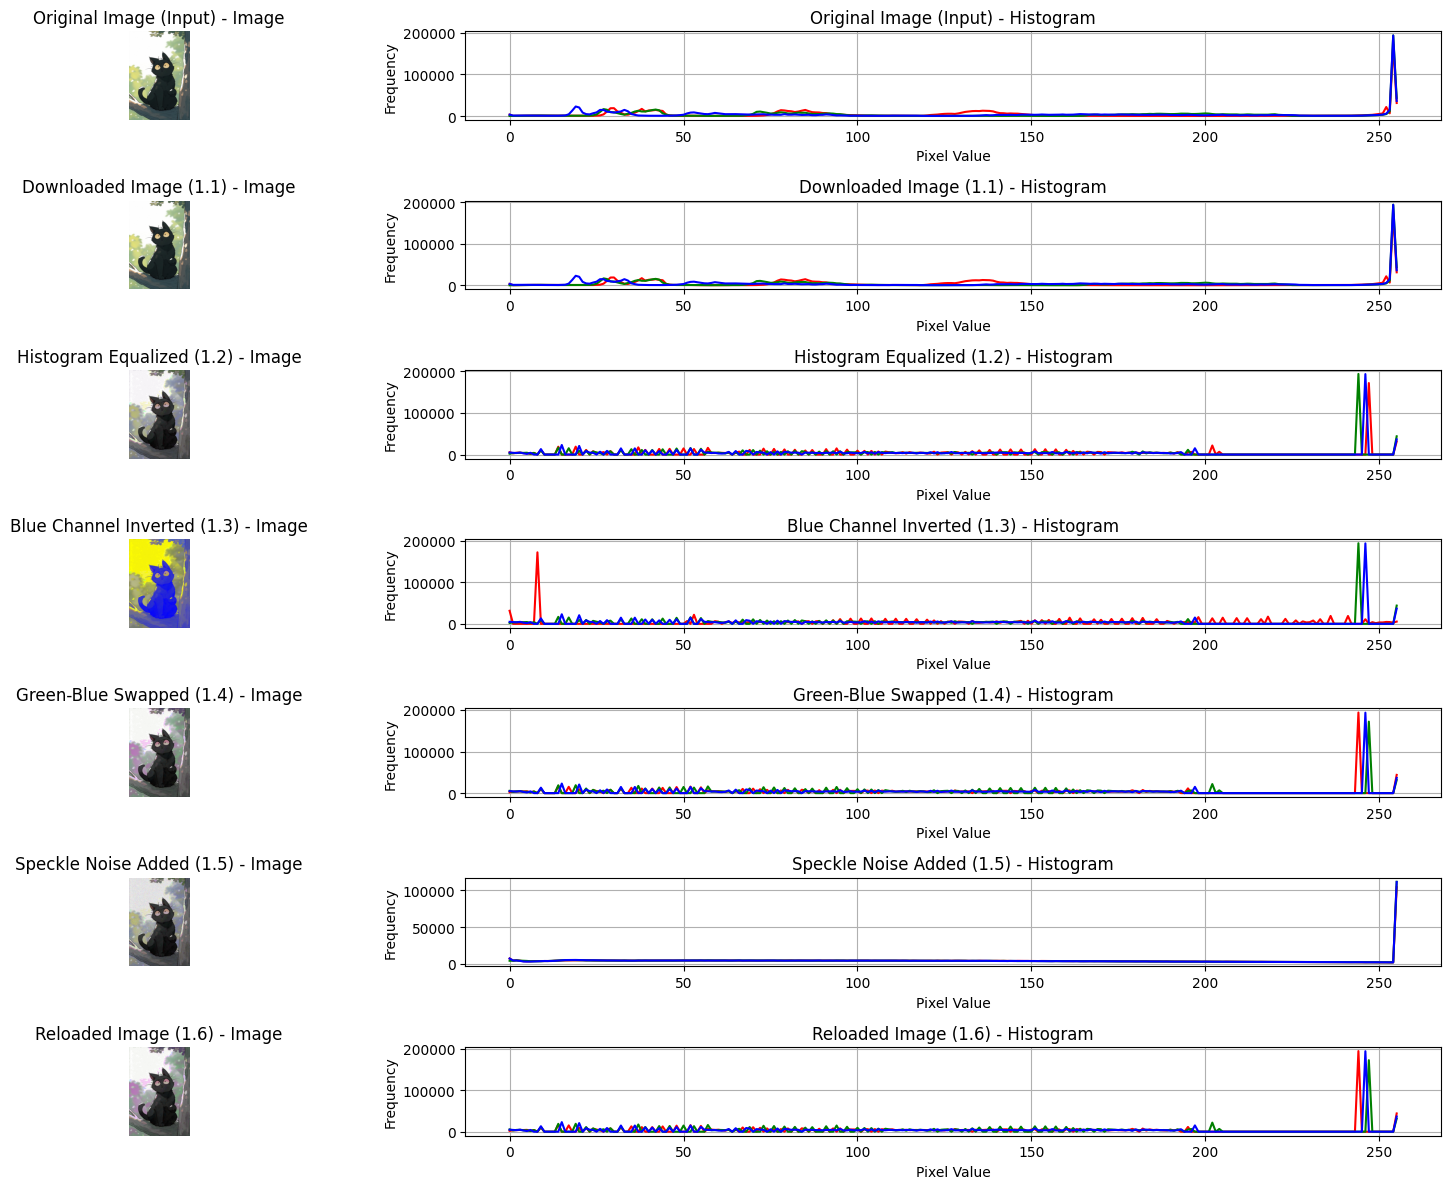

In [43]:
def display_images_with_histograms(images, titles):
    """
    Hiển thị danh sách ảnh kèm histogram của chúng.
    """
    plt.figure(figsize=(18, 12))

    for idx, (img, title) in enumerate(zip(images, titles)):
        # Chuyển đổi ảnh sang RGB
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # Hiển thị ảnh
        plt.subplot(len(images), 2, idx * 2 + 1)
        plt.imshow(img_rgb)
        plt.title(f"{title} - Image")
        plt.axis("off")

        # Hiển thị histogram
        plt.subplot(len(images), 2, idx * 2 + 2)
        colors = ('r', 'g', 'b')
        for i, color in enumerate(colors):
            hist = cv.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color=color)
        plt.title(f"{title} - Histogram")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")
        plt.grid()

    plt.tight_layout()
    plt.show()

# Danh sách ảnh và tiêu đề
images = [
    img,                          # Ảnh gốc (Input image)
    img,                          # Ảnh gốc tải về (1.1)
    equalized_img,                # Ảnh đã cân bằng histogram (1.2)
    inverted_blue_img,            # Ảnh đảo kênh xanh (1.3)
    swapped_channels_img,         # Ảnh hoán đổi kênh xanh và xanh lá (1.4)
    noisy_img,                    # Ảnh bị thêm nhiễu Speckle (1.5)
    downloaded_img                # Ảnh tải lại từ Google Drive (1.6)
]

titles = [
    "Original Image (Input)",
    "Downloaded Image (1.1)",
    "Histogram Equalized (1.2)",
    "Blue Channel Inverted (1.3)",
    "Green-Blue Swapped (1.4)",
    "Speckle Noise Added (1.5)",
    "Reloaded Image (1.6)"
]

# Hiển thị tất cả ảnh và histogram
display_images_with_histograms(images, titles)


# Question 2 (20pts)
2.1. Please shortly introduce a denoising algorithm for a specific domain based on the last two numbers of your student ID.
- Odd number: spatial domain,
- Even number: temporal domain.

2.2. Without transforming the data to the frequency domain, please denoise the images (1.5) and (1.6). Show the output images.

2.3. Please denoise the image (1.5) and (1.6) by frequency domain method(s). Show the output images.

2.4. Please enhance the denoised output from (2.2) or (2.3). Show the output and with their PSNR values comparing with the input.

**khử nhiễu trong miền tần số**.

**Thuật toán: Gaussian Low-Pass Filter (GLPF)**

- **Nguyên lý**:
  1. Chuyển hình ảnh từ miền không gian sang miền tần số bằng **Fourier Transform**.
  2. Áp dụng bộ lọc Gaussian để loại bỏ tần số cao (nhiễu), giữ lại tần số thấp (chi tiết chính).
  3. Chuyển ngược lại về miền không gian bằng **Inverse Fourier Transform**.

- **Ưu điểm**: Hiệu quả trong việc giảm nhiễu mà không làm mờ hình ảnh quá mức.
- **Nhược điểm**: Phụ thuộc vào ngưỡng tần số cắt (\(D_0\)).

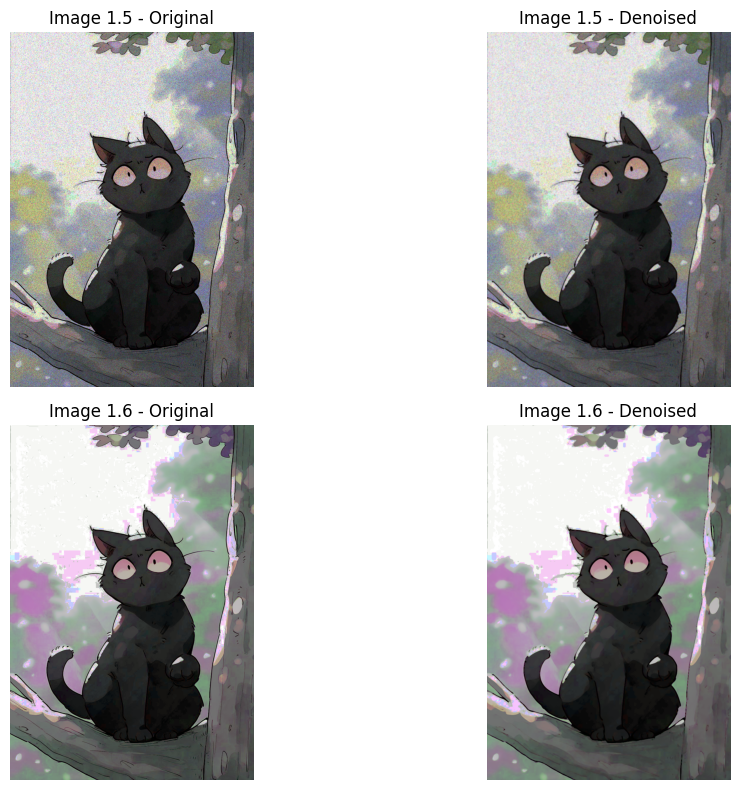

In [44]:
def denoise_image(img, filter_type="median", kernel_size=5):
    """
    Lọc nhiễu cho ảnh trong miền không gian.

    img: Ảnh đầu vào (numpy array).
    filter_type: Loại bộ lọc ("median" hoặc "gaussian").
    kernel_size: Kích thước cửa sổ lọc.
    """
    if filter_type == "median":
        # Lọc trung vị
        denoised_img = cv.medianBlur(img, kernel_size)
    elif filter_type == "gaussian":
        # Lọc Gaussian
        denoised_img = cv.GaussianBlur(img, (kernel_size, kernel_size), 0)
    else:
        raise ValueError("Invalid filter type. Use 'median' or 'gaussian'.")
    return denoised_img

# Lọc nhiễu cho ảnh 1.5 (nhiễu speckle)
denoised_img_15 = denoise_image(noisy_img, filter_type="gaussian", kernel_size=5)

# Lọc nhiễu cho ảnh 1.6 (ảnh tải lại)
denoised_img_16 = denoise_image(downloaded_img, filter_type="median", kernel_size=5)

# Hiển thị kết quả
def display_denoised_images(original_imgs, denoised_imgs, titles):
    """
    Hiển thị ảnh gốc và ảnh sau khi lọc nhiễu.
    """
    plt.figure(figsize=(12, 8))

    for idx, (original, denoised, title) in enumerate(zip(original_imgs, denoised_imgs, titles)):
        # Ảnh gốc
        plt.subplot(len(original_imgs), 2, idx * 2 + 1)
        original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)
        plt.imshow(original_rgb)
        plt.title(f"{title} - Original")
        plt.axis("off")

        # Ảnh sau khi lọc nhiễu
        plt.subplot(len(original_imgs), 2, idx * 2 + 2)
        denoised_rgb = cv.cvtColor(denoised, cv.COLOR_BGR2RGB)
        plt.imshow(denoised_rgb)
        plt.title(f"{title} - Denoised")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Hiển thị ảnh 1.5 và 1.6 trước và sau khi lọc nhiễu
display_denoised_images(
    [noisy_img, downloaded_img],
    [denoised_img_15, denoised_img_16],
    ["Image 1.5", "Image 1.6"]
)


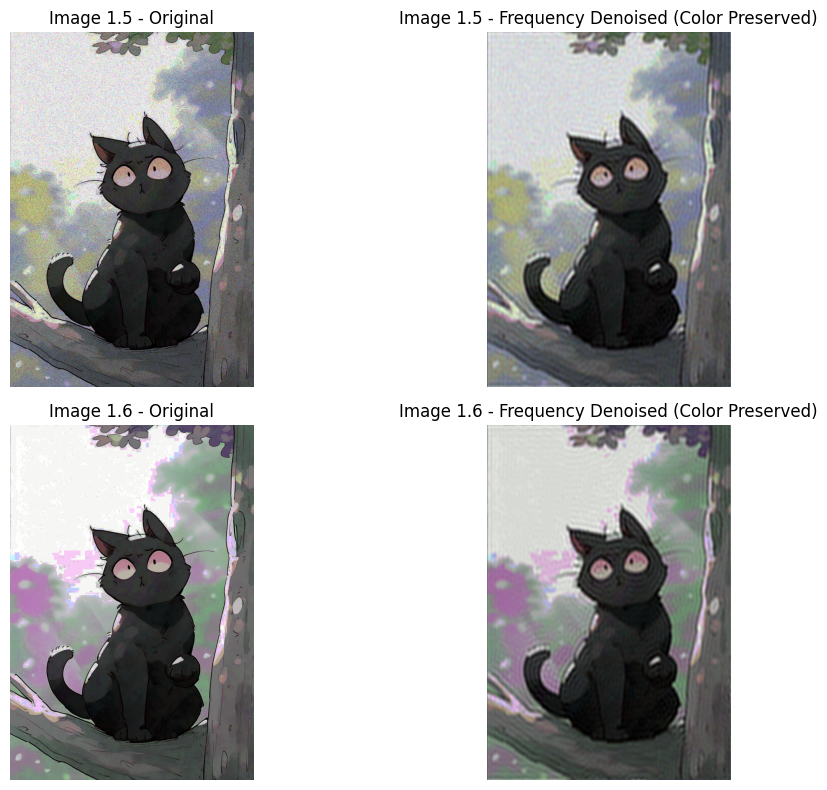

In [49]:
def frequency_domain_denoising_color(img, radius=60):
    """
    Denoise a color image using Low-Pass Filter (LPF) in the frequency domain, preserving color.

    Parameters:
    - img: Input color image as a NumPy array.
    - radius: Radius of the LPF mask.

    Returns:
    - Denoised color image as a NumPy array.
    """
    # Tách riêng các kênh màu B, G, R
    b, g, r = cv.split(img)

    # Hàm khử nhiễu cho từng kênh
    def denoise_channel(channel):
        # Chuyển đổi sang miền tần số (DFT)
        dft = cv.dft(np.float32(channel), flags=cv.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)

        # Tạo bộ lọc thông thấp (LPF)
        rows, cols = channel.shape
        crow, ccol = rows // 2, cols // 2  # Tâm của phổ tần số
        mask = np.zeros((rows, cols, 2), np.uint8)
        cv.circle(mask, (ccol, crow), radius, (1, 1), -1)

        # Áp dụng bộ lọc
        filtered_dft = dft_shift * mask

        # Chuyển ngược về miền không gian (Inverse DFT)
        dft_ishift = np.fft.ifftshift(filtered_dft)
        img_back = cv.idft(dft_ishift)
        img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

        # Chuẩn hóa giá trị pixel
        img_back = cv.normalize(img_back, None, 0, 255, cv.NORM_MINMAX)
        img_back = np.uint8(img_back)
        return img_back

    # Khử nhiễu từng kênh màu
    b_denoised = denoise_channel(b)
    g_denoised = denoise_channel(g)
    r_denoised = denoise_channel(r)

    # Ghép các kênh màu đã khử nhiễu
    denoised_img = cv.merge((b_denoised, g_denoised, r_denoised))
    return denoised_img

# Áp dụng khử nhiễu cho ảnh 1.5 và 1.6
denoised_img_15_color = frequency_domain_denoising_color(noisy_img, radius=60)
denoised_img_16_color = frequency_domain_denoising_color(downloaded_img, radius=60)

# Hiển thị ảnh gốc và ảnh đã khử nhiễu
def display_color_denoised_images(original_imgs, denoised_imgs, titles):
    """
    Display original and color-denoised images side by side.
    """
    plt.figure(figsize=(12, 8))
    for idx, (original, denoised, title) in enumerate(zip(original_imgs, denoised_imgs, titles)):
        # Ảnh gốc
        plt.subplot(len(original_imgs), 2, idx * 2 + 1)
        original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)
        plt.imshow(original_rgb)
        plt.title(f"{title} - Original")
        plt.axis("off")

        # Ảnh sau khi khử nhiễu
        plt.subplot(len(original_imgs), 2, idx * 2 + 2)
        denoised_rgb = cv.cvtColor(denoised, cv.COLOR_BGR2RGB)
        plt.imshow(denoised_rgb)
        plt.title(f"{title} - Frequency Denoised (Color Preserved)")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Hiển thị ảnh
display_color_denoised_images(
    [noisy_img, downloaded_img],
    [denoised_img_15_color, denoised_img_16_color],
    ["Image 1.5", "Image 1.6"]
)


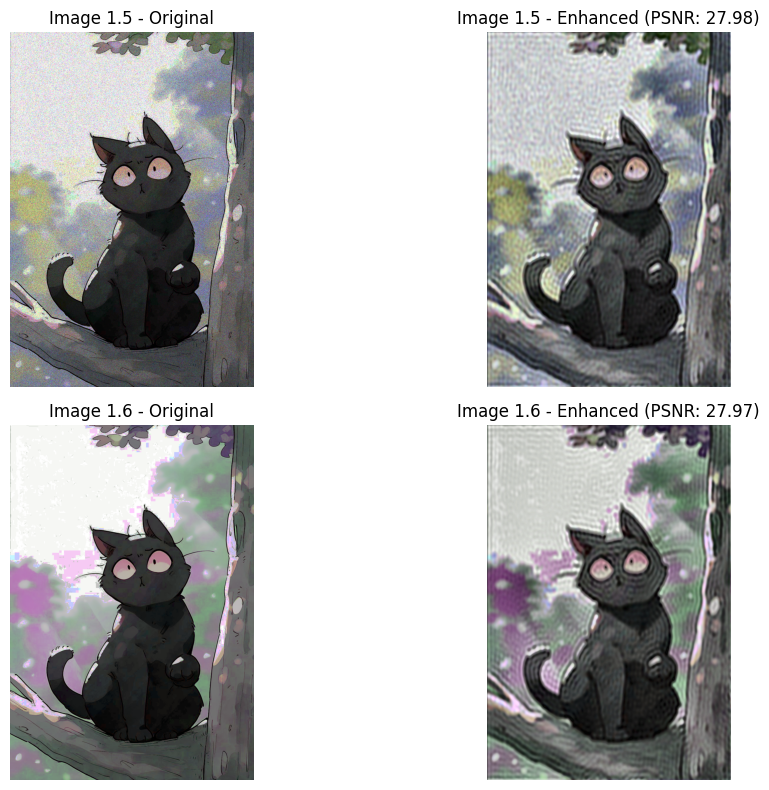

In [50]:
def enhance_image(img):
    """
    Enhance a color image using CLAHE (adaptive histogram equalization).

    Parameters:
    - img: Input denoised image as a NumPy array.

    Returns:
    - Enhanced image as a NumPy array.
    """
    # Convert to LAB color space
    lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

    # Apply CLAHE to the L channel (brightness)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l, a, b = cv.split(lab)
    l = clahe.apply(l)
    enhanced_lab = cv.merge((l, a, b))

    # Convert back to BGR color space
    enhanced_img = cv.cvtColor(enhanced_lab, cv.COLOR_LAB2BGR)
    return enhanced_img

def calculate_psnr(img1, img2):
    """
    Calculate PSNR between two images.

    Parameters:
    - img1: Original input image as a NumPy array.
    - img2: Processed image as a NumPy array.

    Returns:
    - PSNR value as a float.
    """
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Enhance the denoised outputs from (2.3)
enhanced_img_15 = enhance_image(denoised_img_15_color)
enhanced_img_16 = enhance_image(denoised_img_16_color)

# Calculate PSNR values compared to the original noisy images
psnr_15 = calculate_psnr(noisy_img, enhanced_img_15)
psnr_16 = calculate_psnr(downloaded_img, enhanced_img_16)

# Display the enhanced images and PSNR values
def display_enhanced_images(original_imgs, enhanced_imgs, titles, psnr_values):
    """
    Display original and enhanced images with their PSNR values.
    """
    plt.figure(figsize=(12, 8))
    for idx, (original, enhanced, title, psnr) in enumerate(zip(original_imgs, enhanced_imgs, titles, psnr_values)):
        # Original image
        plt.subplot(len(original_imgs), 2, idx * 2 + 1)
        original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)
        plt.imshow(original_rgb)
        plt.title(f"{title} - Original")
        plt.axis("off")

        # Enhanced image
        plt.subplot(len(original_imgs), 2, idx * 2 + 2)
        enhanced_rgb = cv.cvtColor(enhanced, cv.COLOR_BGR2RGB)
        plt.imshow(enhanced_rgb)
        plt.title(f"{title} - Enhanced (PSNR: {psnr:.2f})")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Show enhanced images with PSNR values
display_enhanced_images(
    [noisy_img, downloaded_img],
    [enhanced_img_15, enhanced_img_16],
    ["Image 1.5", "Image 1.6"],
    [psnr_15, psnr_16]
)


# Question 3 (20pts)
3.1. Please resize the image (1.2) to the size of NxN, where N is 1024.

3.2. Please segment areas from the image (3.1) with the below requirement:
- Odd number: having the brightness level at the top 20%,
- Even number: having the brightness level at the bottom 25%.

Note, use the last number of your student ID to pick the requirement.

3.3. Replace the segmented areas in (3.2) with the image (3.1) and reduce the border artifacts.

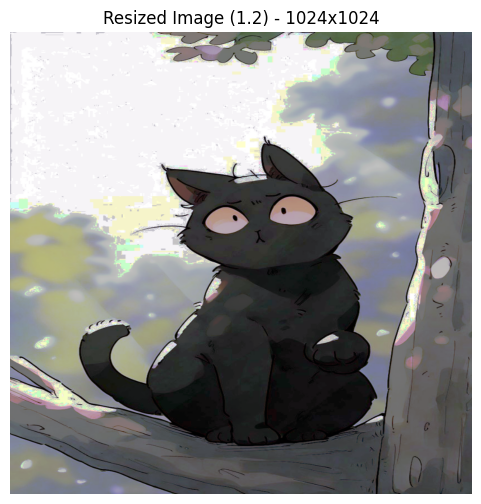

In [51]:
def resize_image(img, size=1024):
    """
    Resize an image to the specified size (NxN).

    Parameters:
    - img: Input image as a NumPy array.
    - size: The desired width and height of the output image (default: 1024).

    Returns:
    - Resized image as a NumPy array.
    """
    resized_img = cv.resize(img, (size, size), interpolation=cv.INTER_LINEAR)
    return resized_img

# Resize the image (1.2) to 1024x1024
resized_img_12 = resize_image(equalized_img, size=1024)

# Display the resized image
plt.figure(figsize=(6, 6))
plt.imshow(cv.cvtColor(resized_img_12, cv.COLOR_BGR2RGB))
plt.title("Resized Image (1.2) - 1024x1024")
plt.axis("off")
plt.show()


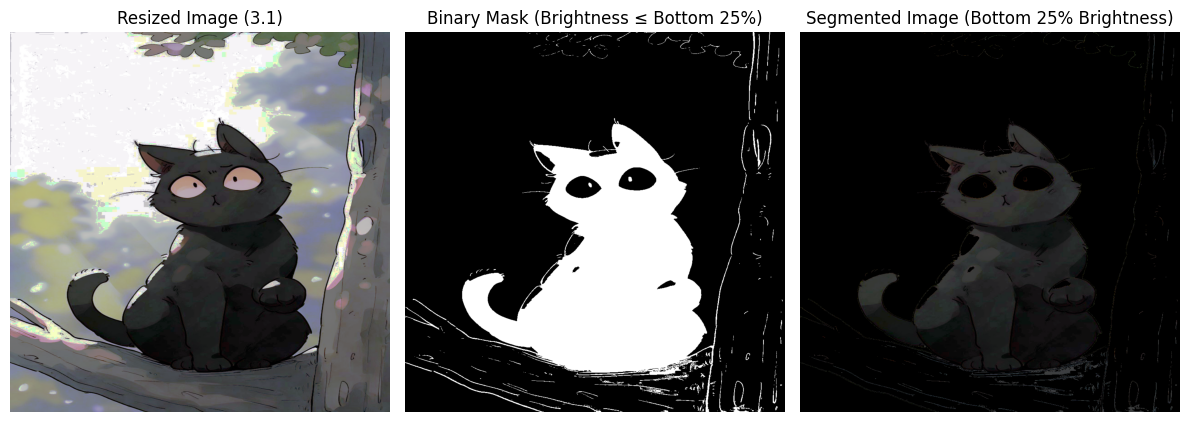

In [53]:
def segment_brightness_bottom(img, threshold_value):
    """
    Segment areas in an image based on brightness levels in the bottom percentage.

    Parameters:
    - img: Input image as a NumPy array.
    - threshold_value: Threshold for segmentation (bottom 25% brightness).

    Returns:
    - Segmented image with areas of interest highlighted.
    - Binary mask of segmented areas.
    """
    # Convert image to grayscale
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Generate binary mask for brightness level in the bottom 25%
    _, binary_mask = cv.threshold(gray_img, threshold_value, 255, cv.THRESH_BINARY_INV)

    # Apply mask to the original image
    segmented_img = cv.bitwise_and(img, img, mask=binary_mask)

    return segmented_img, binary_mask

# Set brightness threshold for bottom 25%
brightness_threshold = int(255 * 0.25)

# Segment areas in the resized image (3.1)
segmented_img_12, binary_mask_12 = segment_brightness_bottom(resized_img_12, brightness_threshold)

# Display the results
plt.figure(figsize=(12, 6))

# Original resized image
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(resized_img_12, cv.COLOR_BGR2RGB))
plt.title("Resized Image (3.1)")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(binary_mask_12, cmap='gray')
plt.title("Binary Mask (Brightness ≤ Bottom 25%)")
plt.axis("off")

# Segmented image
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(segmented_img_12, cv.COLOR_BGR2RGB))
plt.title("Segmented Image (Bottom 25% Brightness)")
plt.axis("off")

plt.tight_layout()
plt.show()


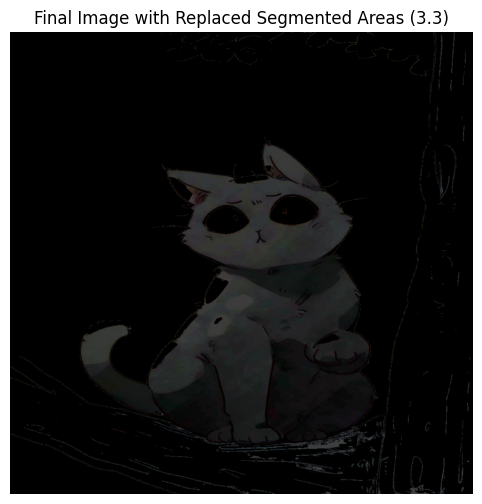

In [54]:
def replace_segmented_areas(original_img, segmented_img, binary_mask):
    """
    Replace segmented areas in the segmented image with the corresponding areas from the original image.
    Reduce border artifacts by blending the transition.

    Parameters:
    - original_img: Original input image (3.1).
    - segmented_img: Image with segmented areas (3.2).
    - binary_mask: Binary mask of segmented areas (from 3.2).

    Returns:
    - Combined image with reduced border artifacts.
    """
    # Ensure the mask is single channel
    binary_mask = cv.cvtColor(binary_mask, cv.COLOR_GRAY2BGR)

    # Replace segmented areas with the original image
    replaced_img = np.where(binary_mask == 255, original_img, segmented_img)

    # Reduce border artifacts using Gaussian Blur
    blurred_img = cv.GaussianBlur(replaced_img, (5, 5), 0)

    # Blend the blurred image with the original
    blended_img = cv.addWeighted(replaced_img, 0.7, blurred_img, 0.3, 0)

    return blended_img

# Replace segmented areas in (3.2) with the original image (3.1)
final_img_12 = replace_segmented_areas(resized_img_12, segmented_img_12, binary_mask_12)

# Display the result
plt.figure(figsize=(12, 6))

# Final image
plt.imshow(cv.cvtColor(final_img_12, cv.COLOR_BGR2RGB))
plt.title("Final Image with Replaced Segmented Areas (3.3)")
plt.axis("off")
plt.show()


# Question 4 (30pts)
4.1. Perform the edge detection on the image (1.2) and clean all trivial details.

4.2. Using the output from (4.1), please highlight the edges in the input image by broadening these areas and increasing the related intensity by 20%.

4.3. Change the areas with the most used color into orange, then write your name at the center.

*Note 1: highlight the name with black color in the boundary areas.*

*Note 2: the target areas should be larger than 10x10, and the trivial areas should be skipped.*

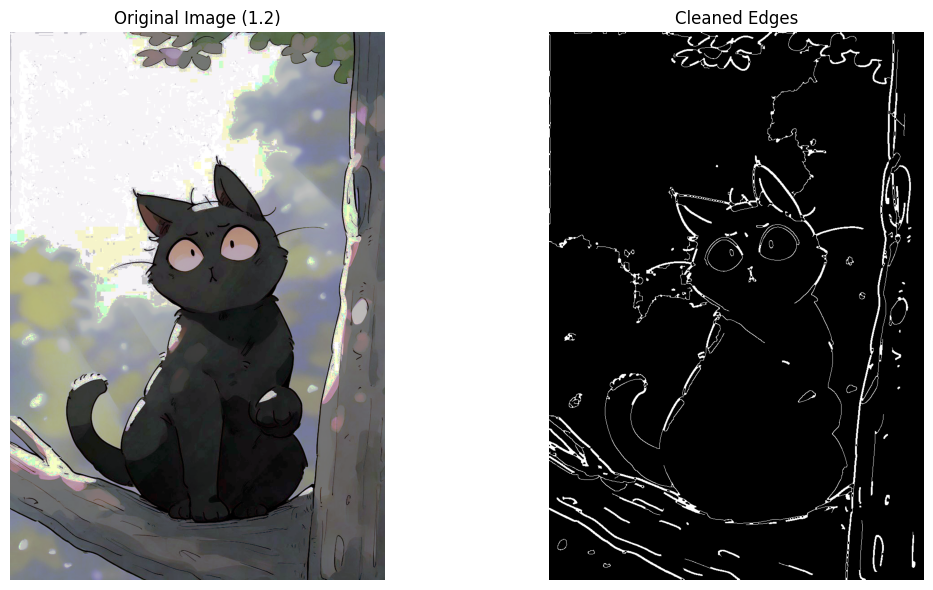

In [55]:
def edge_detection_and_cleaning(img, low_threshold=50, high_threshold=150, kernel_size=(5, 5)):
    """
    Perform edge detection and clean trivial details using morphological operations.

    Parameters:
    - img: Input image as a NumPy array.
    - low_threshold: Lower threshold for Canny edge detection.
    - high_threshold: Upper threshold for Canny edge detection.
    - kernel_size: Kernel size for morphological operations.

    Returns:
    - Cleaned edge-detected image as a binary mask.
    """
    # Convert to grayscale
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred_img = cv.GaussianBlur(gray_img, (5, 5), 0)

    # Perform Canny edge detection
    edges = cv.Canny(blurred_img, low_threshold, high_threshold)

    # Clean trivial details using morphological operations
    kernel = cv.getStructuringElement(cv.MORPH_RECT, kernel_size)
    cleaned_edges = cv.morphologyEx(edges, cv.MORPH_CLOSE, kernel)

    return cleaned_edges

# Perform edge detection and clean trivial details on image (1.2)
edges_cleaned = edge_detection_and_cleaning(equalized_img, low_threshold=50, high_threshold=150, kernel_size=(3, 3))

# Display the result
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
plt.title("Original Image (1.2)")
plt.axis("off")

# Cleaned Edges
plt.subplot(1, 2, 2)
plt.imshow(edges_cleaned, cmap='gray')
plt.title("Cleaned Edges")
plt.axis("off")

plt.tight_layout()
plt.show()


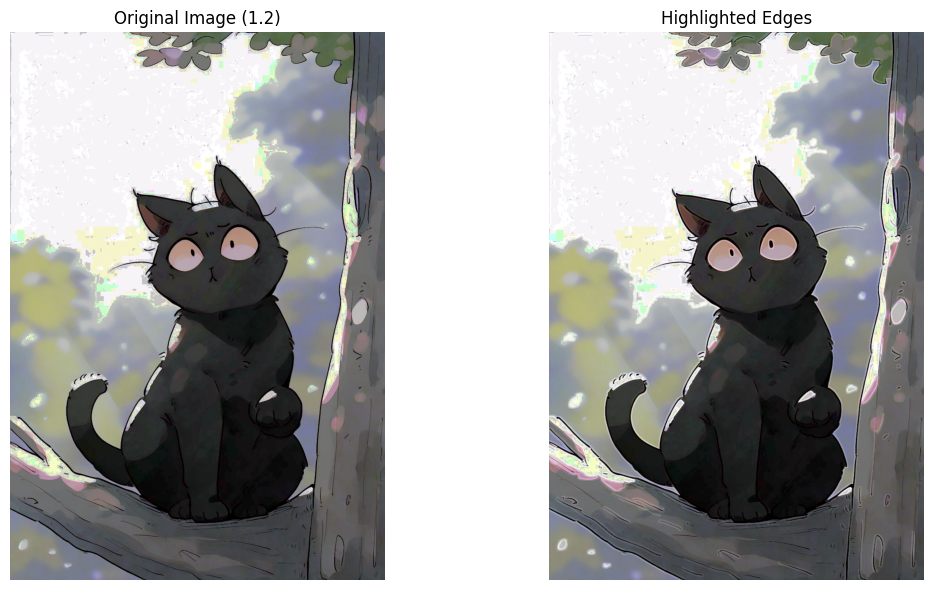

In [56]:
def highlight_edges(img, edges, intensity_scale=1.2, kernel_size=(5, 5)):
    """
    Highlight edges in an image by broadening the edges and increasing their intensity.

    Parameters:
    - img: Original input image as a NumPy array.
    - edges: Edge-detected binary image.
    - intensity_scale: Factor to increase intensity in edge regions (default: 1.2).
    - kernel_size: Kernel size for broadening the edges using dilation.

    Returns:
    - Image with highlighted edges.
    """
    # Broaden the edges using dilation
    kernel = cv.getStructuringElement(cv.MORPH_RECT, kernel_size)
    broadened_edges = cv.dilate(edges, kernel, iterations=1)

    # Create a mask from the broadened edges
    mask = cv.cvtColor(broadened_edges, cv.COLOR_GRAY2BGR)  # Convert to 3-channel mask

    # Increase intensity in the edge areas
    highlighted_img = img.copy()
    highlighted_img = np.where(mask == 255, np.minimum(highlighted_img * intensity_scale, 255), highlighted_img)

    return highlighted_img.astype(np.uint8)

# Highlight the edges in image (1.2) using the cleaned edges from (4.1)
highlighted_img_12 = highlight_edges(equalized_img, edges_cleaned, intensity_scale=1.2, kernel_size=(5, 5))

# Display the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
plt.title("Original Image (1.2)")
plt.axis("off")

# Highlighted Edges Image
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(highlighted_img_12, cv.COLOR_BGR2RGB))
plt.title("Highlighted Edges")
plt.axis("off")

plt.tight_layout()
plt.show()


Màu sắc được sử dụng nhiều nhất (BGR): (247, 244, 246)


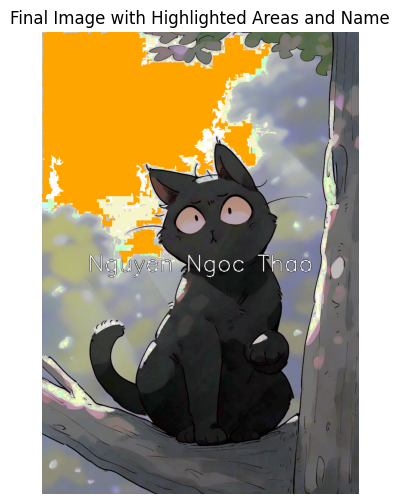

In [70]:
def find_most_used_color(img, min_area=100):
    """
    Xác định màu sắc được sử dụng nhiều nhất trong hình ảnh, loại trừ những vùng nhỏ.

    Parameters:
    - img: Ảnh đầu vào dưới dạng mảng NumPy.
    - min_area: Diện tích tối thiểu để xét (mặc định: 100 pixel).

    Returns:
    - Màu sắc (BGR) được sử dụng nhiều nhất dưới dạng tuple hoặc None nếu không tìm thấy.
    """
    # Chuyển ảnh thành mảng 2D (pixel, kênh màu)
    pixels = img.reshape(-1, 3)
    unique_colors, counts = np.unique(pixels, axis=0, return_counts=True)

    # Sắp xếp theo tần suất giảm dần
    sorted_indices = np.argsort(-counts)  # Thứ tự giảm dần
    for idx in sorted_indices:
        if counts[idx] >= min_area:
            return tuple(unique_colors[idx])
    return None

def highlight_most_used_color(img, target_color, replacement_color=(0, 165, 255), min_area=100):
    """
    Thay đổi các vùng có màu sắc được sử dụng nhiều nhất thành một màu khác.

    Parameters:
    - img: Ảnh đầu vào dưới dạng mảng NumPy.
    - target_color: Màu cần thay thế (BGR).
    - replacement_color: Màu thay thế (mặc định: màu cam BGR).
    - min_area: Diện tích tối thiểu của vùng màu cần thay thế.

    Returns:
    - Ảnh đã được chỉnh sửa với các vùng thay thế.
    """
    if target_color is None:
        print("Không có màu nào đủ điều kiện để thay thế.")
        return img  # Trả về ảnh gốc nếu không tìm thấy màu hợp lệ

    # Tạo mặt nạ (mask) cho màu sắc mục tiêu
    mask = cv.inRange(img, np.array(target_color), np.array(target_color))

    # Tìm các đường viền (contours) của vùng có màu mục tiêu
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Tô màu thay thế cho các vùng đủ lớn
    modified_img = img.copy()
    for contour in contours:
        if cv.contourArea(contour) >= min_area:
            cv.drawContours(modified_img, [contour], -1, replacement_color, thickness=cv.FILLED)
    return modified_img

def write_name_with_highlight(img, text="Nguyen Ngoc Thao", font_scale=2, thickness=2):
    """
    Viết tên ở giữa ảnh với hiệu ứng highlight màu đen xung quanh.

    Parameters:
    - img: Ảnh đầu vào dưới dạng mảng NumPy.
    - text: Tên cần viết (mặc định: "Nguyen Ngoc Thao").
    - font_scale: Kích thước chữ.
    - thickness: Độ dày của chữ.

    Returns:
    - Ảnh đã được chỉnh sửa với tên hiển thị ở giữa.
    """
    # Tính toán kích thước của chữ
    text_size = cv.getTextSize(text, fontFace=cv.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=thickness)[0]
    text_width, text_height = text_size

    # Xác định vị trí chữ (căn giữa)
    img_height, img_width = img.shape[:2]
    text_x = (img_width - text_width) // 2
    text_y = (img_height + text_height) // 2

    # Vẽ viền đen (highlight)
    cv.putText(img, text, (text_x, text_y), fontFace=cv.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, color=(0, 0, 0), thickness=thickness * 2)

    # Vẽ chữ màu trắng
    cv.putText(img, text, (text_x, text_y), fontFace=cv.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, color=(255, 255, 255), thickness=thickness)

    return img

# Load ảnh đầu vào
input_img = input_img = equalized_img  # Đường dẫn ảnh của bạn
if input_img is None:
    raise ValueError("Không thể load ảnh! Hãy kiểm tra đường dẫn.")

# Tìm màu sắc được sử dụng nhiều nhất
most_used_color = find_most_used_color(input_img, min_area=100)

if most_used_color:
    print("Màu sắc được sử dụng nhiều nhất (BGR):", most_used_color)
else:
    print("Không tìm thấy màu sắc nào có diện tích đủ lớn!")

# Highlight các vùng có màu sắc chủ đạo
highlighted_img = highlight_most_used_color(input_img, most_used_color, replacement_color=(0, 165, 255), min_area=100)

# Viết tên ở giữa ảnh
final_img = write_name_with_highlight(highlighted_img, text="Nguyen Ngoc Thao", font_scale=2, thickness=2)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))
plt.imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))  # Chuyển từ BGR sang RGB để hiển thị đúng màu
plt.title("Final Image with Highlighted Areas and Name")
plt.axis("off")
plt.show()
